<a href="https://colab.research.google.com/github/Prashant-67/host/blob/main/workshop4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown

In [2]:
!gdown 1nui_KojqOrK8oZKrUQHeiGOpStM0dG_K

Downloading...
From (original): https://drive.google.com/uc?id=1nui_KojqOrK8oZKrUQHeiGOpStM0dG_K
From (redirected): https://drive.google.com/uc?id=1nui_KojqOrK8oZKrUQHeiGOpStM0dG_K&confirm=t&uuid=7abe5eac-cf5b-4ac2-97c7-49015e3d9b84
To: /content/Copy of Copy of devnagari digit.zip
100% 16.6M/16.6M [00:00<00:00, 207MB/s]


In [3]:
!unzip digit.zip

Streaming output truncated to the last 5000 lines.
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104019.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104021.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104023.p

In [4]:
pip install numpy pillow tensorflow

Streaming output truncated to the last 5000 lines.
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/104019.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/104021.png  
  inflating: /content/DevanagariHandwrittenDigitDataset/Train/digit_7/104023.png  
  inflating: /content/DevanagariHandwritte

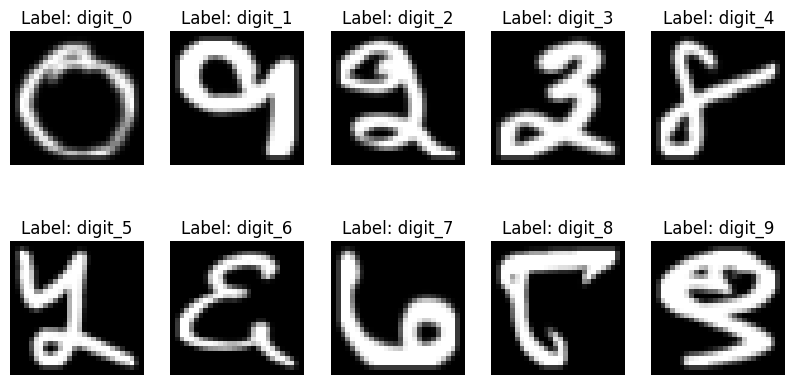

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

!unzip digit.zip -d /content/


train_dir = "/content/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/DevanagariHandwrittenDigitDataset/Test"


img_height, img_width = 28, 28


def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))
    class_map = {name: i for i, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)


            img = Image.open(img_path).convert("L")
            img = img.resize((img_width, img_height))
            img = np.array(img) / 255.0

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels), class_names


x_train, y_train, class_names = load_images_from_folder(train_dir)
x_test, y_test, _ = load_images_from_folder(test_dir)


x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)


y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")


plt.figure(figsize=(10, 5))
for i, class_name in enumerate(class_names):
    img_index = np.where(y_train.argmax(axis=1) == i)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[img_index].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {class_name}")
    plt.axis("off")
plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


model = Sequential([
    Flatten(input_shape=(img_height, img_width, 1)),
    Dense(64, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


266/266 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.6550 - loss: 1.1122 - val_accuracy: 0.1893 - val_loss: 2.1388 - learning_rate: 5.0000e-04
Epoch 2/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9126 - loss: 0.2697 - val_accuracy: 0.9530 - val_loss: 0.1699 - learning_rate: 5.0000e-04
Epoch 3/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9411 - loss: 0.1807 - val_accuracy: 0.9790 - val_loss: 0.0665 - learning_rate: 5.0000e-04
Epoch 4/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9558 - loss: 0.1410 - val_accuracy: 0.9790 - val_loss: 0.0636 - learning_rate: 5.0000e-04
Epoch 5/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9671 - loss: 0.1147 - val_accuracy: 0.9697 - val_loss: 0.0883 - learning_rate: 5.0000e-04
Epoch 6/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9701 - loss: 0.0941 - val_accuracy: 0.9780 - val_loss: 0.0623 - learning_rate: 5.0000e-04
Epoch 7/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.

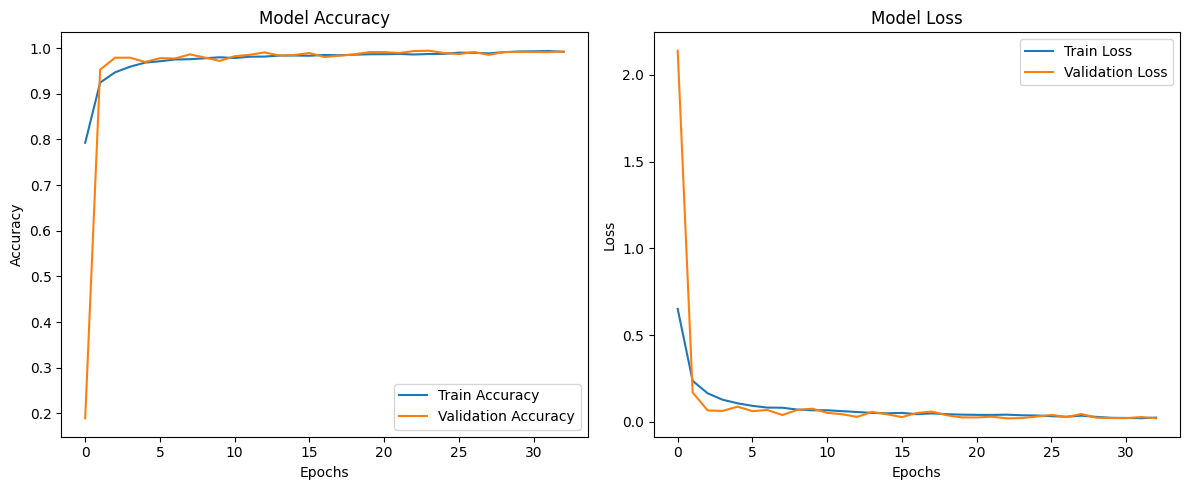

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Apply Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train)

# Build an Improved CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(10, activation='softmax')  # 10 classes
])

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for Better Training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the Model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=50,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot Training History
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()


In [13]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Print the evaluation results
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


94/94 - 0s - 2ms/step - accuracy: 0.9937 - loss: 0.0209
Test Accuracy: 99.37%
Test Loss: 0.0209


In [8]:
# Save the trained model to an HDF5 file
model.save("handwritten_digit_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [9]:
# Load the saved model
loaded_model = tf.keras.models.load_model("handwritten_digit_model.h5")
print("Model loaded successfully!")


Model loaded successfully!


In [10]:
# Evaluate the loaded model on the test dataset
test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)

# Print the results
print(f"Loaded Model Test Accuracy: {test_acc * 100:.2f}%")
print(f"Loaded Model Test Loss: {test_loss:.4f}")


94/94 - 1s - 16ms/step - accuracy: 0.9937 - loss: 0.0209
Loaded Model Test Accuracy: 99.37%
Loaded Model Test Loss: 0.0209


In [11]:
import numpy as np

# Make predictions on the test set
predictions = model.predict(x_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded y_test back to class labels for comparison
true_labels = np.argmax(y_test, axis=1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


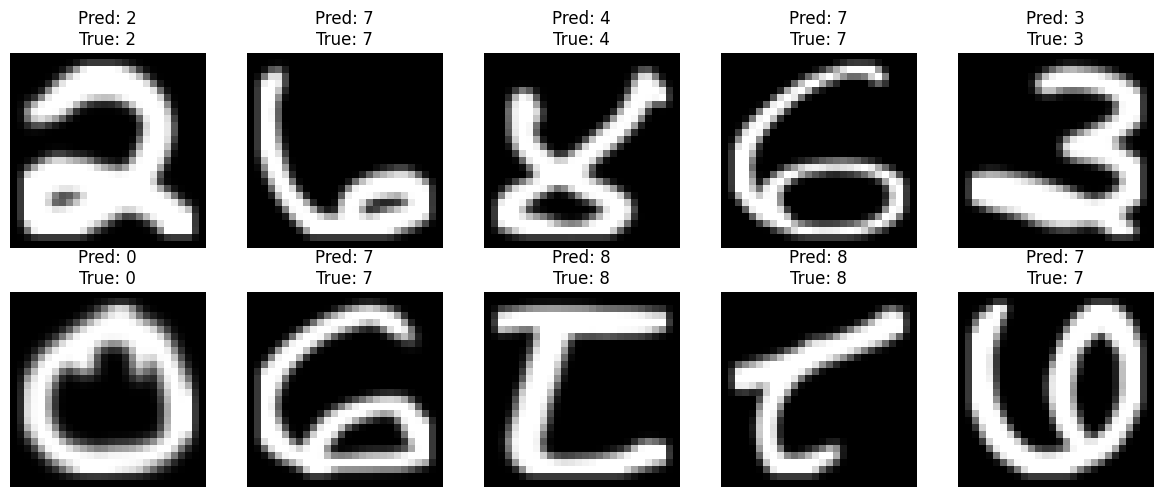

In [12]:
import matplotlib.pyplot as plt

# Select random test samples
num_samples = 10
random_indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(12, 5))
for i, index in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[index]}\nTrue: {true_labels[index]}")
    plt.axis("off")

plt.tight_layout()
plt.show()
